Cyan channel array shape: (6000, 4000)


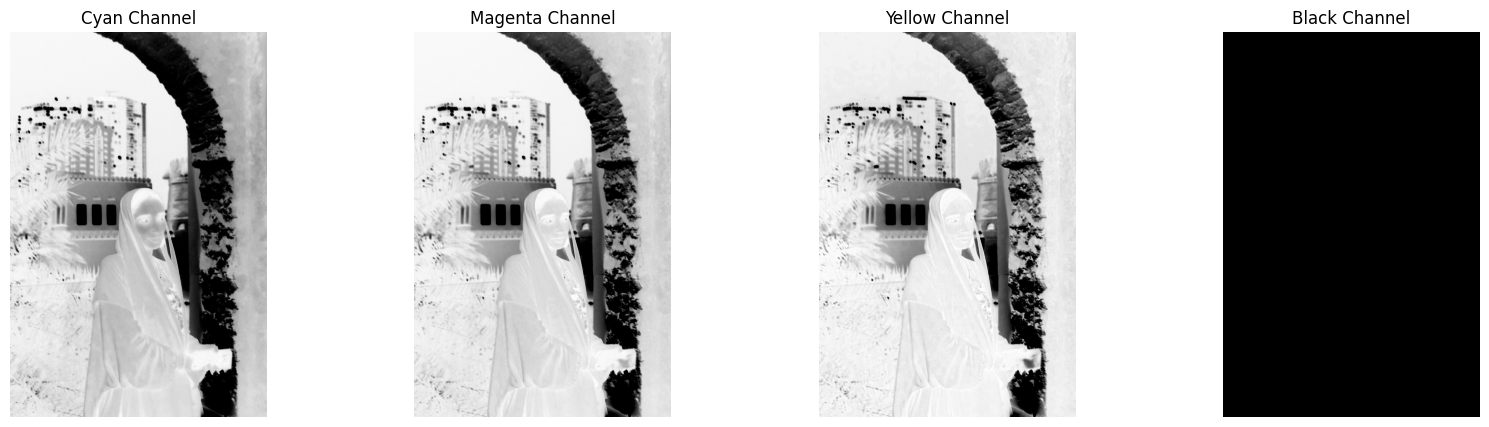

In [3]:
from PIL import Image
import numpy as np
np.random.seed(2025)
import matplotlib.pyplot as plt # Optional: for displaying the results

# 1. Open the image
# Make sure to replace 'your_image.jpg' with the path to your image file.
# The original image can be in any mode (e.g., RGB).
img = Image.open('image2.jpg')

# 2. Convert the image to CMYK color mode
# Pillow handles the color space conversion automatically.
cmyk_img = img.convert('CMYK')

# 3. Split the image into its individual channels
# This returns separate Image objects for Cyan, Magenta, Yellow, and Black.
c_channel, m_channel, y_channel, k_channel = cmyk_img.split()

# 4. Convert each channel Image object to a 2D NumPy array
# Each array will have the shape (height, width).
cyan_array = np.array(c_channel)
magenta_array = np.array(m_channel)
yellow_array = np.array(y_channel)
black_array = np.array(k_channel)

# Optional: Print the shape of one array to verify it is 2D
print(f"Cyan channel array shape: {cyan_array.shape}")

# Optional: Display the individual channels (as grayscale images)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(cyan_array, cmap='gray')
axes[0].set_title('Cyan Channel')
axes[1].imshow(magenta_array, cmap='gray')
axes[1].set_title('Magenta Channel')
axes[2].imshow(yellow_array, cmap='gray')
axes[2].set_title('Yellow Channel')
axes[3].imshow(black_array, cmap='gray')
axes[3].set_title('Black Channel')

for ax in axes:
    ax.axis('off')

plt.show()

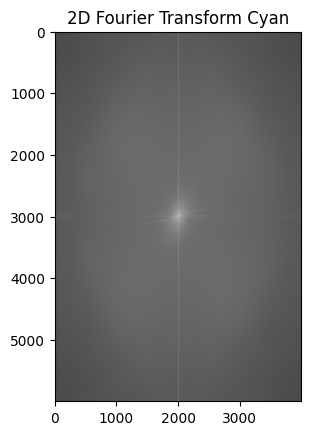

In [159]:
#taking the 2D Fourier transform
fourier_cyan = np.fft.fft2(cyan_array)
fourier_magenta = np.fft.fft2(magenta_array)
fourier_yellow = np.fft.fft2(yellow_array)
fourier_black = np.fft.fft2(black_array)

#shifting the zero frequency component to the center
fourier_cyan_shifted = np.fft.fftshift(fourier_cyan)
fourier_magenta_shifted = np.fft.fftshift(fourier_magenta)
fourier_yellow_shifted = np.fft.fftshift(fourier_yellow)
fourier_black_shifted = np.fft.fftshift(fourier_black)

plt.figure() 
plt.imshow(np.log(np.abs(fourier_cyan_shifted)), cmap='gray')
plt.title('2D Fourier Transform Cyan')
plt.show()


In [ ]:
cyan_array[0]

array([245, 246, 248, ..., 195, 195, 182], dtype=uint8)

array([245, 246, 248, ..., 195, 195, 182], dtype=uint8)

In [166]:
fourier_cyan = np.empty(cyan_array.shape, dtype=complex)
fourier_magenta = np.empty(magenta_array.shape, dtype=complex)
fourier_yellow = np.empty(yellow_array.shape, dtype=complex)
fourier_black = np.empty(black_array.shape, dtype=complex)
for i,cyan_row in enumerate(cyan_array):
    fourier_cyan[i] = np.fft.fft(cyan_row)
for i,magenta_row in enumerate(magenta_array):
    fourier_magenta[i] = np.fft.fft(magenta_row)
for i,yellow_row in enumerate(yellow_array):
    fourier_yellow[i] = np.fft.fft(yellow_row)
for i,black_row in enumerate(black_array):
    fourier_black[i] = np.fft.fft(black_row)

In [167]:
fourier_cyan.shape

(6000, 4000)

In [ ]:
block_lim = 150

fourier_cyan[:,0] = 0
fourier_cyan_collapsed = np.zeros_like(fourier_cyan[:fourier_cyan.shape[0]//block_lim,:])
indices = list(range(0, fourier_cyan.shape[0]-3, block_lim))
print(indices)
for num,i in enumerate(indices):
    fourier_cyan_collapsed[num,:] = np.sum(fourier_cyan[i:i+block_lim,:], axis=0)
print(fourier_cyan_collapsed.shape)
fourier_cyan_trunc = fourier_cyan_collapsed[:, :-fourier_cyan_collapsed.shape[1]//2]



fourier_magenta[:,0] = 0
fourier_magenta_collapsed = np.zeros_like(fourier_magenta[:fourier_magenta.shape[0]//block_lim,:])
indices = list(range(0, fourier_magenta.shape[0]-3, block_lim))
print(indices)
for num,i in enumerate(indices):
    fourier_magenta_collapsed[num,:] = np.sum(fourier_magenta[i:i+block_lim,:], axis=0)
print(fourier_magenta_collapsed.shape)
fourier_magenta_trunc = fourier_magenta_collapsed[:, :-fourier_magenta_collapsed.shape[1]//2]


fourier_yellow[:,0] = 0
fourier_yellow_collapsed = np.zeros_like(fourier_yellow[:fourier_yellow.shape[0]//block_lim,:])
indices = list(range(0, fourier_yellow.shape[0]-3, block_lim))
print(indices)
for num,i in enumerate(indices):
    fourier_yellow_collapsed[num,:] = np.sum(fourier_yellow[i:i+block_lim,:], axis=0)
print(fourier_yellow_collapsed.shape)
fourier_yellow_trunc = fourier_yellow_collapsed[:, :-fourier_yellow_collapsed.shape[1]//2]


fourier_black[:,0] = 0
fourier_black_collapsed = np.zeros_like(fourier_black[:fourier_black.shape[0]//block_lim,:])
indices = list(range(0, fourier_black.shape[0]-3, block_lim))
print(indices)
for num,i in enumerate(indices):
    fourier_black_collapsed[num,:] = np.sum(fourier_black[i:i+block_lim,:], axis=0)
print(fourier_black_collapsed.shape)
fourier_black_trunc = fourier_black_collapsed[:, :-fourier_black_collapsed.shape[1]//2]



def normalise(array):
    array_min = np.min(array)
    array_max = np.max(array)
    return (array - array_min) / (array_max - array_min)



plt.figure()
#for i in range(len(fourier_cyan)):
for i in [1,2]:
    if i < len(fourier_cyan_trunc)//2:
        c = 'b'
    else:
        c = 'pink'
    fourier_cyan_norm = normalise(np.abs(fourier_cyan_trunc[i]))
    plt.plot(fourier_cyan_norm, color=c)
    plt.title('1D Fourier Transform Cyan')
    #plt.xlim(0.5,50)
    #plt.ylim(0,max(fourier_cyan_norm[i])[1:50])))
plt.show()

[0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250, 2400, 2550, 2700, 2850, 3000, 3150, 3300, 3450, 3600, 3750, 3900, 4050, 4200, 4350, 4500, 4650, 4800, 4950, 5100, 5250, 5400, 5550, 5700, 5850]
(40, 4000)
[0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250, 2400, 2550, 2700, 2850, 3000, 3150, 3300, 3450, 3600, 3750, 3900, 4050, 4200, 4350, 4500, 4650, 4800, 4950, 5100, 5250, 5400, 5550, 5700, 5850]
(40, 4000)
[0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250, 2400, 2550, 2700, 2850, 3000, 3150, 3300, 3450, 3600, 3750, 3900, 4050, 4200, 4350, 4500, 4650, 4800, 4950, 5100, 5250, 5400, 5550, 5700, 5850]
(40, 4000)
[0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250, 2400, 2550, 2700, 2850, 3000, 3150, 3300, 3450, 3600, 3750, 3900, 4050, 4200, 4350, 4500, 4650, 4800, 4950, 5100, 5250, 5400, 5550, 5700, 5850]
(40, 4000)


IndexError: index 50 is out of bounds for axis 0 with size 40

<Figure size 640x480 with 0 Axes>

In [ ]:
# assign notes to numbers:

note_nums = {
    'C' : 0,
    'C#' : 1,
    'D' : 2,  
    'D#' : 3,
    'E' : 4,
    'F' : 5,
    'F#' : 6,
    'G' : 7,
    'G#' : 8,
    'A' : 9,
    'A#' : 10,
    'B' : 11,
    'C2' : 12
}

#assign each frequency bin from fft to a note:
def get_notes_and_weights_from_fftfreq(fft_array, threshold = 0.05,trunc_num = 5):
    #assuming fft_array is 1D array of fft magnitudes
    notes_in_row = []
    notes_weights = []
    for i in range(len(fft_array)):
        magnitude = np.abs(fft_array[i])
        if magnitude > threshold:  # define a threshold to filter out noise
            note_index = i % 13  # assuming 12 notes in an octave
            octave = i // 13
            note = list(note_nums.keys())[note_index]
            notes_in_row.append(note)
            notes_weights.append(magnitude)
    notes_in_row = [x for _, x in sorted(zip(notes_weights, notes_in_row), key=lambda pair: pair[0])]
    notes_in_row = [convert_number_to_note(convert_note_to_number(notes_in_row[i]) + convert_note_to_number(notes_in_row[i+50])**2) for i in range(len(notes_in_row)-50)]
    notes_weights = sorted(notes_weights)
    notes_in_row_trunc = notes_in_row[-trunc_num:]
    notes_weights_trunc = notes_weights[-trunc_num:]
    notes_and_weights = { 'notes': notes_in_row_trunc, 'weights': notes_weights_trunc }
    return notes_and_weights # nb the magnitude is normalised


 

In [ ]:
# major key
major_key_nums = np.array([0,2,4,5,7,9,11, 12])
minor_key_nums = np.array([0,2,3,5,7,8,10, 12])

all_majors = [major_key_nums+i for i in range (0,13)]
all_minors = [minor_key_nums+i for i in range (0,13)]

def convert_number_to_note(number):
    if number in note_nums.values():
        number = number
    else:
        while number > 12:
            number = number % 13
    note = list(note_nums.keys())[number]
    return note

def convert_note_to_number(note):
    return note_nums[note]

In [ ]:
#if majority of notes in four lines fall in certain key, choose that key. 16 overall
def choose_key_from_lines(lines_notes):
    #lines_notes is list of dicts with notes and weights from get_notes_and_weights_from_fftfreq
    all_notes = []
    for line in lines_notes:
        all_notes.extend(line['notes'])
    all_note_nums = [convert_note_to_number(note) for note in all_notes]
    best_key = None
    best_key_count = 0
    for key in all_majors + all_minors:
        key_count = sum(1 for note_num in all_note_nums if note_num in key)
        if key_count > best_key_count:
            best_key_count = key_count
            best_key = key
    return best_key

# list of chords
all_chords = {
    'major' : [0,4,7],
    'minor' : [0,3,7],
    'diminished' : [0,3,6],
    'augmented' : [0,4,8],
    'suspended2' : [0,2,7],
    'suspended4' : [0,5,7]
}

# generate chord from key
def generate_chord_nums_from_key(key, chord_type='major'):
    root_note_num = key[0]  # assuming the first note in the key is the root
    chord_intervals = all_chords[chord_type]
    chord_nums = [(root_note_num + interval) % 13 for interval in chord_intervals]
    chord_notes = [convert_number_to_note(num) for num in chord_nums]
    return {'chord notes':chord_notes, 'chord nums':chord_nums}


# for later - make chord change likely repeated. hard to break out of unless it 'fits' nicely or is strongly different


In [204]:
# if there is a note in the key, change to that note. 
# if there are no notes that fall within the key, hold the previous one.

def filter_notes_through_key(notes, weighted = False, notes_and_weights = 'None', root = 'C', key='major' # or minor
                             , previous_note=None):
    filtered_notes = []
    filtered_weights = []
    if key == 'major':
        key_root = root
        key_nums = major_key_nums + (convert_note_to_number(key_root))
    elif key == 'minor':
        key_root = root
        key_nums = minor_key_nums + (convert_note_to_number(key_root))
    
    if weighted:
        for note, weight in zip(notes_and_weights['notes'], notes_and_weights['weights']):
            note_num = convert_note_to_number(note)
            if note_num in key_nums:
                filtered_notes.append(note)
                #filtered_weights.append(weight)  
    else:
        for note in notes:
            note_num = convert_note_to_number(note)
            if note_num in key_nums:
                filtered_notes.append(note)
    if not filtered_notes and previous_note is not None:
        filtered_notes.append(previous_note)
        #filtered_weights.append(1.0)  # Assign a default weight
    return filtered_notes


In [205]:
get_notes_and_weights_from_fftfreq(fourier_cyan[50], threshold=0.1)['notes']

['C#', 'C#', 'A', 'D', 'G']

In [206]:
all_notes_cyan = np.array([np.array(get_notes_and_weights_from_fftfreq(fourier_cyan_collapsed[i], threshold=0.1)['notes']) for i in range(len(fourier_cyan_collapsed))])
print(all_notes_cyan.shape)

(40, 5)


In [208]:
filtered_output_cyan = np.zeros_like(all_notes_cyan)
for i in range(len(filtered_output_cyan)):
    filtered_results_cyan = filter_notes_through_key(all_notes_cyan[i], root='C', key='major')
    filtered_output_cyan[i,:len(filtered_results_cyan)] = filtered_results_cyan
print(filtered_output_cyan.shape)
np.set_printoptions(threshold=np.inf)
print(filtered_output_cyan)
np.set_printoptions(threshold=1000)

(40, 5)
[['E' '' '' '' '']
 ['C2' 'F' 'F' 'B' 'B']
 ['B' 'A' 'C2' '' '']
 ['B' 'C2' 'D' 'G' '']
 ['C' 'A' 'C2' '' '']
 ['G' 'C' 'C2' '' '']
 ['C2' 'C' 'C' 'A' '']
 ['D' 'D' 'G' 'D' '']
 ['F' 'C2' 'D' '' '']
 ['G' 'D' 'B' 'C2' '']
 ['C' 'G' 'C2' '' '']
 ['G' 'A' 'C2' '' '']
 ['G' 'D' 'B' 'C2' '']
 ['C' 'C2' 'B' 'C2' '']
 ['G' '' '' '' '']
 ['G' 'C' 'E' 'F' '']
 ['D' 'C' 'A' 'G' '']
 ['G' 'C2' 'G' '' '']
 ['D' '' '' '' '']
 ['A' 'D' '' '' '']
 ['D' 'E' 'F' '' '']
 ['D' 'A' 'C' '' '']
 ['D' 'C' 'G' 'D' '']
 ['C' 'C' 'C' 'A' '']
 ['D' '' '' '' '']
 ['B' 'D' 'G' 'D' '']
 ['A' 'D' 'G' '' '']
 ['C2' 'B' '' '' '']
 ['A' 'E' 'B' 'B' '']
 ['F' 'F' '' '' '']
 ['C2' 'B' '' '' '']
 ['C2' 'A' '' '' '']
 ['A' 'D' 'G' 'C2' 'B']
 ['C' 'B' 'F' 'F' '']
 ['G' 'E' 'E' '' '']
 ['D' '' '' '' '']
 ['E' 'F' 'F' 'D' 'G']
 ['G' 'C2' 'A' '' '']
 ['B' 'C' 'G' 'D' '']
 ['C' 'C2' 'D' '' '']]


In [209]:
# parameters for music

# UNDERLYING
# fifth of chord or with inner note
# make drum beats and have frequencies choose the rhythm.


# ANOTHER IDEA - when a note plays, project the frequency inverse ffted on the photo to visually show the composition

In [ ]:
from midiutil.MidiFile import MIDIFile
import pandas as pd

# create your MIDI object
mf = MIDIFile(1)     # only 1 track
track = 0   # the only track

time = 0    # start at the beginning
mf.addTrackName(track, time, "Sample Track")
mf.addTempo(track, time, 120)

# create np array of all the output notes, iterate through each row to obtain the notes
all_notes_cyan = np.array([np.array(get_notes_and_weights_from_fftfreq(fourier_cyan_collapsed[i], threshold=0.1)['notes']) for i in range(len(fourier_cyan_collapsed))])
filtered_output_cyan = np.zeros_like(all_notes_cyan)

for i in range(len(filtered_output_cyan)):
    filtered_results_cyan = filter_notes_through_key(all_notes_cyan[i], root='C', key='major')
    filtered_output_cyan[i,:len(filtered_results_cyan)] = filtered_results_cyan

all_notes_magenta = np.array([np.array(get_notes_and_weights_from_fftfreq(fourier_magenta_collapsed[i], threshold=0.1)['notes']) for i in range(len(fourier_magenta_collapsed))])
filtered_output_magenta = np.zeros_like(all_notes_magenta)

for i in range(len(filtered_output_magenta)):
    filtered_results_magenta = filter_notes_through_key(all_notes_magenta[i], root='C', key='major')
    filtered_output_magenta[i,:len(filtered_results_magenta)] = filtered_results_magenta



all_notes_yellow = np.array([np.array(get_notes_and_weights_from_fftfreq(fourier_yellow_collapsed[i], threshold=0.1)['notes']) for i in range(len(fourier_yellow_collapsed))])
filtered_output_yellow = np.zeros_like(all_notes_yellow)

for i in range(len(filtered_output_yellow)):
    filtered_results_yellow = filter_notes_through_key(all_notes_yellow[i], root='C', key='major')
    filtered_output_yellow[i,:len(filtered_results_yellow)] = filtered_results_yellow


# NEXT, MAKE IT BASED ON WEIGHTS, IF THE SAME THEN PLAYED TOGETHER
# for each numpy row of notes, add to midi
for index, row in enumerate(filtered_output_cyan):
    channel = 1
    volume = 100
    row = row[row != '']  # filter out any zeros if present
    for i, note in enumerate(row):
        pitch = convert_note_to_number(note) + 60 # transpose to middle C octave
        time = index * 4 + (i * 4/(len(row))) # start on beat 0, and each bar after
        if index > len(filtered_output_cyan) - 5:
            time = index * 4
            duration = 4
        else:
            time = index * 4 + (i * 4/(len(row))) # start on beat 0, and each bar after
            duration = 4/(len(row))      # 1 bar long in total
        mf.addNote(track, 0, 36, index * 4, 4, 80)
        mf.addNote(track, 0, 29, index * 4, 4, 80)
        mf.addNote(track, channel, pitch, time, duration, 90)

for index, row in enumerate(filtered_output_magenta):
    channel = 2
    volume = 100
    row = row[row != '']  # filter out any zeros if present
    for i, note in enumerate(row):
        pitch = convert_note_to_number(note) + 60 # transpose to middle C octave
        if index > len(filtered_output_magenta) - 5:
            time = index * 4
            duration = 4
        else:
            time = index * 4 + (i * 4/(len(row))) # start on beat 0, and each bar after
            duration = 4/(len(row))      # 1 bar long in total
        mf.addNote(track, channel, pitch, time, duration, 90)

for index, row in enumerate(filtered_output_yellow):
    channel = 3
    volume = 100
    row = row[row != '']  # filter out any zeros if present
    for i, note in enumerate(row):
        pitch = convert_note_to_number(note) + 60 # transpose to middle C octave
        time = index * 4 + (i * 4/(len(row))) # start on beat 0, and each bar after
        if index > len(filtered_output_yellow) - 5:
            time = index * 4
            duration = 4
        else:
            time = index * 4 + (i * 4/(len(row))) # start on beat 0, and each bar after
            duration = 4/(len(row))      # 1 bar long in total
        mf.addNote(track, channel, pitch, time, duration, 90)

# NEXT:map out chords for each part.

# write it to disk
with open("output.mid", 'wb') as outf:
    mf.writeFile(outf)

In [212]:
import pygame
pygame.init()
pygame.mixer.music.load("output.mid")
pygame.mixer.music.play()